# Imports

In [110]:
# Packages
import pandas as pd
from statsmodels.formula.api import ols

# Helper functions
from ipynb.fs.full.functions import *

# Other notebooks for combining code
from ipynb.fs.full.semrush_call import execute_call
from ipynb.fs.full.text_division_and_styling import LoopGetHeaderCountFromURL, LoopGetListsCountFromURL
from ipynb.fs.full.semrush_beoordeling_concurrentieniveau import getKeywordDifficulty 
from ipynb.fs.full.InboundOutboundScraper import loop_get_all_website_links
from ipynb.fs.full.SemRush_InboundOutbound_Backlink import get_all_website_links_semrush
from ipynb.fs.full.img_scraper import *
from ipynb.fs.full.content_recency import GetContentRecency, days_between_today_and_last_modified
from ipynb.fs.full.keyword_density import GetKeywordDensity
from ipynb.fs.full.KeywordInText import getKeywordmain_dataInText
from ipynb.fs.full.website_speed import GetWebsiteSpeed

# Disable warnings for function "getKeywordmain_dataInText"
import warnings
warnings.filterwarnings('ignore')

# Executing of functions
## Variables for keyword search

In [4]:
keyword = 'bouwmaterialen' # What keyword do you want to call for?
result_count = '5' # How many keyword results do you want to gather data for? Maximum for our license is 99

# Do you want to overwrite the SEMrush keyword call if it has already been executed before?
# This is to save on SEMrush token usage
potential_overwrite = False

# Do you want to save the result of the end dataframe?
save = True

## Creating dataframes

In [5]:
def ExecuteAllCalls():
    # Define variables for the SEMrush call and gather keyword data
    export_columns = 'Dn,Ur'
    endpoint_url = 'https://api.semrush.com/'
    main_dataframe = execute_call(keyword, result_count, export_columns, endpoint_url, potential_overwrite)
    main_dataframe
    
    # Add used keyword to the dataframe
    keyword_list = []
    keyword_list += int(result_count) * [keyword]
    main_dataframe['Keyword'] = keyword_list
    
    # Executing functions from other notebooks to gather data
    print("  0% - Executing getKeywordDifficulty")
    KeywordDifficultyFunction = getKeywordDifficulty(keyword, potential_overwrite)
    KeywordDifficultyList = []
    KeywordDifficultyList += int(result_count) * [KeywordDifficultyFunction['Kd'][0]]
    main_dataframe['Kd'] = KeywordDifficultyList
    print(" 10% - Executing GetKeywordDensity")
    main_dataframe = main_dataframe.merge(GetKeywordDensity(keyword, main_dataframe), how='left', left_on='Ur', right_on='URL')
    print(" 20% - Executing LoopGetHeaderCountFromURL")
    main_dataframe['HeaderCount'] = LoopGetHeaderCountFromURL(main_dataframe)
    print(" 30% - Executing LoopGetListsCountFromURL")
    main_dataframe['ListsCount'] = LoopGetListsCountFromURL(main_dataframe)
    print(" 40% - Executing loop_get_all_website_links")
    website_links = loop_get_all_website_links(main_dataframe)
    main_dataframe['InternalLinksSoup'] = website_links[0]
    main_dataframe['ExternalLinksSoup'] = website_links[1]
    print(" 50% - Executing get_all_website_links_semrush")
    main_dataframe['InternalLinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'internal', potential_overwrite)
    main_dataframe['ExternalLinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'external', potential_overwrite)
    main_dataframe['BacklinksSEMrush'] = get_all_website_links_semrush(main_dataframe, 'backlink', potential_overwrite)
    main_dataframe['PageAScore'] = get_all_website_links_semrush(main_dataframe, 'page_ascore', potential_overwrite)
    main_dataframe['DomainAScore'] = get_all_website_links_semrush(main_dataframe, 'domain_ascore', potential_overwrite)
    main_dataframe['AScore'] = get_all_website_links_semrush(main_dataframe, 'ascore', potential_overwrite)
    print(" 60% - Executing createDF") 
    main_dataframe = main_dataframe.merge(createDF(main_dataframe).drop('Domain', axis=1), how='left', left_on='Ur', right_on='url')
    print(" 70% - Executing getKeywordmain_dataInText")
    main_dataframe = main_dataframe.rename(columns={'META-Title': 'METATitle', 'META-Description': 'METADescription', 'Image Tags': 'ImageTags'}) # Rename columns for bugfix
    main_dataframe = getKeywordmain_dataInText(main_dataframe)
    print(" 80% - Executing GetContentRecency and days_between_today_and_last_modified")
    main_dataframe = main_dataframe.merge(GetContentRecency(main_dataframe), how='left', left_on='Ur', right_on='URL')
    main_dataframe = days_between_today_and_last_modified(main_dataframe)
    print(" 90% - Executing GetWebsiteSpeed")
    main_dataframe = main_dataframe.merge(GetWebsiteSpeed(keyword, main_dataframe), how='left', left_on='Ur', right_on='URL')
    
    # Set correct index, potentially save the output and return the dataframe
    main_dataframe = main_dataframe.set_index('Number').drop(['url', 'URL', 'URL_x', 'URL_y'], axis=1) # Drop URLs because they stay in there from the merges
    main_dataframe_hash = hash_variable(main_dataframe)
    if save == True:
        main_dataframe.to_csv(f"calls\dataframe-{main_dataframe_hash}.csv")
    print("100% - Done")
    return main_dataframe

In [6]:
main_dataframe = ExecuteAllCalls()

Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Fri May 28 23:06:21 2021
  0% - Executing getKeywordDifficulty
Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Fri May 28 23:06:21 2021
 10% - Executing GetKeywordDensity
 20% - Executing LoopGetHeaderCountFromURL
 30% - Executing LoopGetListsCountFromURL
 40% - Executing loop_get_all_website_links
 50% - Executing get_all_website_links_semrush
Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Fri May 28 23:06:20 2021
Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Fri May 28 23:06:20 2021
Deze call is al een keer uitgevoerd, we gaan verder met de bestaande resultaten.
Dit bestand is laatst gewijzigd op: Fri May 28 23:06:20 2021
Deze call is al een keer uitgevoerd, we g

In [7]:
main_dataframe.head().transpose()

Number,0,1,2,3,4
Dn,bouwmaat.nl,hornbach.nl,bouwbestel.nl,online-bouwmaterialen.nl,bouwonline.com
Ur,https://www.bouwmaat.nl/bouwmaterialen,https://www.hornbach.nl/shop/Bouwmateriaal/S44...,https://www.bouwbestel.nl/bouwmaterialen.html,https://www.online-bouwmaterialen.nl/,https://www.bouwonline.com/
Keyword,bouwmaterialen,bouwmaterialen,bouwmaterialen,bouwmaterialen,bouwmaterialen
Kd,84.13,84.13,84.13,84.13,84.13
keyword_density_percentage,0.46,0.74,0.28,1.2,0.07
HeaderCount,4,10,2,3,7
ListsCount,31,17,7,31,7
InternalLinksSoup,1430,215,2595,138,1029
ExternalLinksSoup,10,7,14,10,3
InternalLinksSEMrush,43,42,128,2,42


# Example of simple prediction

In [58]:
# y = a + bx = 3.6 + 0.0149x
# Calculate the index position based on FCP
# Input: FCP in milliseconds, output: position in Google's rankings
def calculateIndex(fcp, a, b):
    if (fcp <= 0):
        print("Voer een FCP hoger dan 0 in a.u.b.")
    else:
        result = a + b * fcp
        result = round(result)
        return result
    

# Calculate the needed FCP for a certrain position
# Input: position in Google's rankings, output: lowest and highest possible FCP in milliseconds predicted for this position
def calculateFcp(index, a, b):
    if (index < 1):
        print("Please enter an index value of 1 or higher.")
        return None, None
    else:
        result_list = [] # Make list to define max and minimum FCP values
        index = round(index) # Round index because position is a whole number
        
        for i in range(1,100000): # Calculate FCP-scores til 100000 milliseconds (100 seconds)
            result = round(a + b * i)
            if result == index:
                result_list.append(i)
        
        if len(result_list) >= 1: # Check if there are any results and if so return them
            return min(result_list), max(result_list), 
        else: # Return nothing if no results have been found
            return None, None

In [98]:
# Temporarily use filled dataframe
main_dataframe = pd.read_csv("calls\dataframe-5017509d55da23026c0ad22e8097cd391d3f99905027ce7c802f4cc97f32552e.csv")

# Generate linear regression model with FCP
model = ols("Number ~ FCP", data=main_dataframe.reset_index()).fit()

In [99]:
index_fcp_dict = {}
for index in range(1,51):
    fcp_score = calculateFcp(index, model.params[0], model.params[1])
    index_fcp_dict[index] = [fcp_score[0], fcp_score[1]]
    
print("For the given keyword and results of the dataframe, printed below are the results for the top 50 keywords")
print("and how they would be predicted based on FCP score. The low and the high scores is the minimum and maximum")
print("FCP speed in milliseconds needed to reach that position in Google according to our model.\n")

for index, fcp in index_fcp_dict.items():
    print(f"Position {index}: Low of {fcp[0]} and high of {fcp[1]}")

For the given keyword and results of the dataframe, printed below are the results for the top 50 keywords
and how they would be predicted based on FCP score. The low and the high scores is the minimum and maximum
FCP speed in milliseconds needed to reach that position in Google according to our model.

Position 1: Low of None and high of None
Position 2: Low of None and high of None
Position 3: Low of None and high of None
Position 4: Low of None and high of None
Position 5: Low of None and high of None
Position 6: Low of None and high of None
Position 7: Low of None and high of None
Position 8: Low of None and high of None
Position 9: Low of None and high of None
Position 10: Low of None and high of None
Position 11: Low of None and high of None
Position 12: Low of None and high of None
Position 13: Low of None and high of None
Position 14: Low of None and high of None
Position 15: Low of None and high of None
Position 16: Low of 1 and high of 86
Position 17: Low of 87 and high of 171

In [107]:
# Create new prediction dataframe
prediction_dataframe = pd.DataFrame(list(index_fcp_dict.keys()),columns = ['index'])

# Make some lists and gather results from the dictionary
fcp_low = []
fcp_high = []
fcp_avg = [] # An average column between low and high seems nice to have
fcp_actual = [] # The actual FCP score for this index number from the real dataframe
for value in index_fcp_dict.values():
    fcp_low.append(value[0])
    fcp_high.append(value[1])
    
    if value[0] and value[1] is not None:
        fcp_avg.append((value[0] + value[1]) / 2)
    elif value[0] is not None and value[1] is None:
        fcp_avg.append(value[0])
    elif value[0] is None and value[1] is not None:
        fcp_avg.append(value[1])
    else:
        fcp_avg.append(None)      
                       
    df_to_list = main_dataframe['FCP'].to_list()
    for i in df_to_list:
        if len(fcp_actual) < 50: # Add check for 50 maximum because of hardcoded top 50
            fcp_actual.append(i)
            
# Add lists to dataframe
prediction_dataframe['fcp_low'], prediction_dataframe['fcp_high'], prediction_dataframe['fcp_avg'], prediction_dataframe['fcp_actual'] = [fcp_low, fcp_high, fcp_avg, fcp_actual]
prediction_dataframe.tail()

,index,fcp_low,fcp_high,fcp_avg,fcp_actual
45,46,2562.0,2647.0,2604.5,994.0
46,47,2648.0,2732.0,2690.0,2847.0
47,48,2733.0,2817.0,2775.0,NaN
48,49,2818.0,2903.0,2860.5,NaN
49,50,2904.0,2988.0,2946.0,NaN


Text(0, 0.5, 'FCP score')

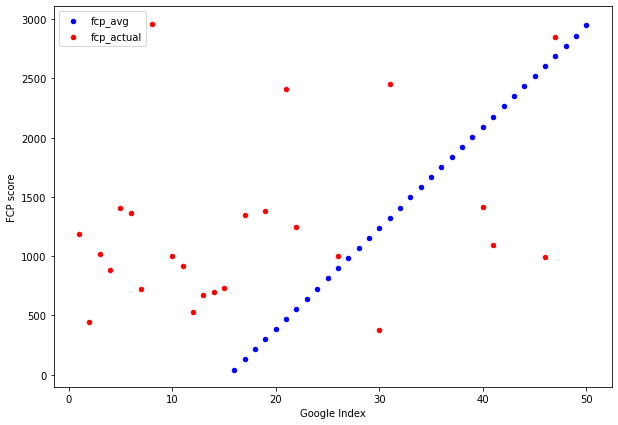

In [116]:
plt.rcParams["figure.figsize"] = [10, 7]
ax = prediction_dataframe.plot(kind="scatter", x="index", y="fcp_avg", color="b", label="fcp_avg")
prediction_dataframe.plot(kind="scatter", x="index", y="fcp_actual", color="r", label="fcp_actual", ax=ax)
ax.set_xlabel("Google Index")
ax.set_ylabel("FCP score")